<a href="https://colab.research.google.com/github/yufei-ilariahuang/Ergonomics-Chair-project/blob/main/pharsemachine_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install phrasemachine
! pip install tqdm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for phrasemachine: filename=phrasemachine-1.0.7-py3-none-any.whl size=2694856 sha256=2ffe837536f50eafe30bb86090ea20305e35757d67a38dcb7f744b214d255de5
  Stored in directory: /root/.cache/pip/wheels/84/b3/4d/e849568396756266ef3ae974fc5ab86965f706deffd8e74973
Successfully built phrasemachine


In [ ]:
import pandas as pd
import csv

In [ ]:
df = pd.read_csv("all_data_FullDate_someLackrating_someLackPrice.csv")

In [ ]:
# Display rows where 'Review' is None (or NaN)
null_reviews = df[df['Review'].isnull()]
print(null_reviews)


Empty DataFrame
Columns: [Review Date, rating, Product, Review, country, Price]
Index: []


In [ ]:
# Remove rows where 'Review' is None or NaN
df = df.dropna(subset=['Review'])




unigram_bag_of_words

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('english')
# List of custom stop words
custom_stop_words = [
    'chair', 'ergonomics', 'ergonomic', 'product', 'furniture', 'item', 'https',  'buy', 'purchase', 'order', "for", "account",
    "not","on","FOR", "ACCOUNT","is","This","For","The","the","hi","It","it","and", "And","this","to","It is",'said',
    'say',"one", "like","well", "seat","good","review", "steelcase","Steelcase","out","while","consider","without","enough","would","may",
    "especially","i","get","extremely","unless","please","rather","thing","herman","miller","probably","my","gives","told","order","-","they","bit",
    "if", "go", "going","them", "although","chairs","non","amazon","con","great","short","large"
]

stop_words.extend(custom_stop_words)

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#built-in dict class in Python,it provides a default value for a key that does not exist.
from collections import defaultdict
from tqdm.notebook import tqdm
# Creating a bag of words
unigram_bag_of_words = defaultdict(int)
text_list = df['Review'].tolist()

# Iterate over each review
for document in df['Review']:
    # Replace periods and split into words
    for word in document.replace(".", "").split():
      if word not in stop_words:
        unigram_bag_of_words[word.lower()] += 1  # Convert to lower case for consistency

# Display the bag of words
print(dict(unigram_bag_of_words))

{'big': 730, 'farce': 1, 'these': 98, 'lack': 145, 'major': 123, 'adjustment,': 69, 'ability': 133, 'move': 816, 'out,': 140, 'away': 333, 'back': 9223, 'while': 166, 'focus': 23, 'back,': 633, 'forgot': 9, 'legs': 710, 'without': 20, 'hits': 79, 'mid-thigh': 6, 'legs,': 65, 'front': 452, 'edge': 174, 'tipping': 36, 'downward,': 5, 'effectively': 15, 'cuts': 25, 'blood': 34, 'circulation': 89, 'rest': 1444, 'excruciating': 7, 'a': 580, 'high': 983, 'footrest': 73, 'provides': 266, 'relief': 63, 'bend': 56, 'knee': 49, 'tuck': 15, 'foot': 198, 'beneath': 13, 'leg': 239, 'occasionally,': 4, 'prevents': 21, 'hard': 1225, 'rock': 154, 'give': 625, "don't": 145, 'fooled': 11, 'meshing': 1, 'sit': 2124, 'on,': 62, 'notice': 121, 'cushioning': 110, 'becomes': 63, 'sitting': 2020, 'awhile': 42, 'comfortable': 4763, 'folding': 22, 'canvas': 1, 'take': 531, 'outdoor': 1, 'event': 7, 'those': 22, 'long': 1378, 'uncomfortable': 1096, 'i': 30948, 'even': 1697, 'cushion': 1282, 'arms': 1140, 'adjust

In [ ]:
!pip install WordCloud
from wordcloud import WordCloud

In [ ]:
import wordcloud
import PIL

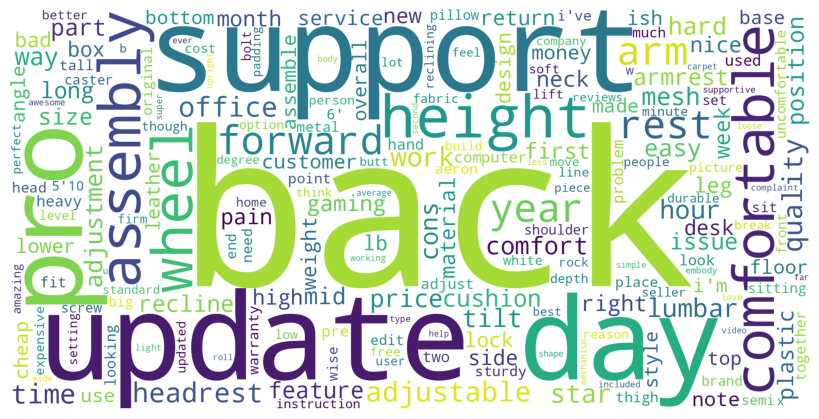

In [ ]:
import matplotlib.pyplot as plt

# Concatenate all text entries into a single string
text = ' '.join(unigram_bag_of_words.keys())


# Now generate the word cloud
wordcloud = WordCloud(width=2000, height=1000, stopwords=stop_words, background_color='white').generate(text)

# Plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Adding phrases to the bag of words using pharse machine

In [ ]:
import phrasemachine

#Join the List into a Single String:
#1. convert the list of reviews into a single string where each review is separated by a space.
#2.Remove all periods from this string.
text = ' '.join(df['Review'].tolist()).replace(".", "")

out = phrasemachine.get_phrases(text)
out

{'num_tokens': 1153380,
 'counts': Counter({'big farce': 1,
          'one major adjustment': 1,
          'major adjustment': 2,
          'back while the major focus': 1,
          'major focus': 1,
          'legs without this adjustment': 1,
          'front edge': 36,
          'blood circulation': 8,
          'blood circulation to the rest': 1,
          'circulation to the rest': 1,
          'a high footrest': 1,
          'high footrest': 1,
          'enough relief': 1,
          'other leg': 7,
          'folding canvas': 1,
          'folding canvas chair': 1,
          'canvas chair': 1,
          'outdoor event': 1,
          'long legs': 39,
          'own cushion': 5,
          'long handles': 1,
          'chair for 40 hours': 1,
          '40 hours': 11,
          'legs may': 1,
          'one position': 16,
          'seat design': 7,
          'seat design please': 1,
          'seat design please test': 1,
          'design please': 1,
          'design please tes

In [ ]:
out['counts'].most_common(100)

[('lumbar support', 2025),
 ('office chair', 1591),
 ('great chair', 903),
 ('customer service', 649),
 ('herman miller', 546),
 ('arm rests', 545),
 ('comfortable chair', 511),
 ('seat cushion', 478),
 ('good chair', 460),
 ('home office', 445),
 ('head rest', 408),
 ('office chairs', 390),
 ('back support', 388),
 ('arm rest', 355),
 ('lower back', 304),
 ('back of the chair', 286),
 ('new chair', 280),
 ('best chair', 262),
 ('nice chair', 257),
 ('desk chair', 254),
 ('high quality', 243),
 ('ergonomic chair', 241),
 ('other chairs', 236),
 ('old chair', 225),
 ('good quality', 206),
 ('price point', 195),
 ('few months', 192),
 ('long hours', 187),
 ('quality chair', 186),
 ('customer support', 178),
 ('adjustable lumbar', 172),
 ('long time', 171),
 ('build quality', 170),
 ('long periods', 166),
 ('few days', 159),
 ('6 months', 154),
 ('height adjustment', 152),
 ('periods of time', 150),
 ('tall people', 148),
 ('back pain', 145),
 ('gaming chair', 144),
 ('hard plastic', 137)

In [ ]:
phrase_extract = out['counts']
# Filter out phrases
keys_to_remove = [phrase for phrase in phrase_extract if 'chair' in phrase or 'herman' in phrase or 'steelcase' in phrase or 'miller' in phrase]

# Now remove these keys from the dictionary
for key in keys_to_remove:
    del phrase_extract[key]

phrase_extract.most_common(100)



[('lumbar support', 2025),
 ('customer service', 649),
 ('arm rests', 545),
 ('seat cushion', 478),
 ('home office', 445),
 ('head rest', 408),
 ('back support', 388),
 ('arm rest', 355),
 ('lower back', 304),
 ('high quality', 243),
 ('good quality', 206),
 ('price point', 195),
 ('few months', 192),
 ('long hours', 187),
 ('customer support', 178),
 ('adjustable lumbar', 172),
 ('long time', 171),
 ('build quality', 170),
 ('long periods', 166),
 ('few days', 159),
 ('6 months', 154),
 ('height adjustment', 152),
 ('periods of time', 150),
 ('tall people', 148),
 ('back pain', 145),
 ('hard plastic', 137),
 ('mesh seat', 133),
 ('adjustable lumbar support', 132),
 ('seat depth', 128),
 ('little bit', 126),
 ('back rest', 123),
 ('great support', 118),
 ('5 stars', 116),
 ('blade wheels', 115),
 ('2 years', 113),
 ('ergonomic office', 113),
 ('neck support', 111),
 ('good support', 108),
 ('few hours', 107),
 ('gas lift', 107),
 ('few weeks', 106),
 ('30 minutes', 106),
 ('3 months', 

In [ ]:
try_excel = phrase_extract.most_common(100)
# 转换成DataFrame
df_phrase = pd.DataFrame(try_excel, columns=['Phrase', 'Count'])

# 保存到Excel文件
df_phrase.to_csv('phrase_.csv', index=False)

In [ ]:
!pip install matplotlib-venn
!pip install cartopy
import cartopy
!apt-get -qq install -y libfluidsynth1
!apt-get -qq install -y graphviz && pip install pydot
import pydot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 49.5 MB/s eta 0:00:00
E: Package 'libfluidsynth1' has no installation candidate


final extracted phrase:phrase_extract


final extracted words:dict(unigram_bag_of_words)

In [ ]:
final_phrase = dict(phrase_extract)
final_words = dict(unigram_bag_of_words)

In [ ]:
tops_phrases = dict(phrase_extract.most_common(100))
tops_phrases

{'lumbar support': 2025,
 'customer service': 649,
 'arm rests': 545,
 'seat cushion': 478,
 'home office': 445,
 'head rest': 408,
 'back support': 388,
 'arm rest': 355,
 'lower back': 304,
 'high quality': 243,
 'good quality': 206,
 'price point': 195,
 'few months': 192,
 'long hours': 187,
 'customer support': 178,
 'adjustable lumbar': 172,
 'long time': 171,
 'build quality': 170,
 'long periods': 166,
 'few days': 159,
 '6 months': 154,
 'height adjustment': 152,
 'periods of time': 150,
 'tall people': 148,
 'back pain': 145,
 'hard plastic': 137,
 'mesh seat': 133,
 'adjustable lumbar support': 132,
 'seat depth': 128,
 'little bit': 126,
 'back rest': 123,
 'great support': 118,
 '5 stars': 116,
 'blade wheels': 115,
 '2 years': 113,
 'ergonomic office': 113,
 'neck support': 111,
 'good support': 108,
 'few hours': 107,
 'gas lift': 107,
 'few weeks': 106,
 '30 minutes': 106,
 '3 months': 102,
 'other reviews': 102,
 'only thing': 101,
 'price range': 100,
 'seat height': 

In [ ]:
from collections import Counter

words = defaultdict(int)
# Iterate over each review
for document in df['Review']:
    # Replace periods and split into words
    for word in document.replace(".", "").split():
      if word not in stop_words:
        words[word.lower()] += 1  # Convert to lower case for consistency
unigram = Counter(words)
top_words = unigram.most_common(100)
top_words

[('i', 30948),
 ('back', 9223),
 ('support', 4820),
 ('comfortable', 4763),
 ('office', 3199),
 ('lumbar', 2839),
 ('easy', 2301),
 ('chair,', 2252),
 ("i'm", 2217),
 ('really', 2180),
 ('sit', 2124),
 ('sitting', 2020),
 ('time', 1915),
 ('quality', 1911),
 ('work', 1861),
 ('price', 1838),
 ('arm', 1832),
 ('much', 1808),
 ('also', 1791),
 ('use', 1774),
 ('even', 1697),
 ('adjustable', 1577),
 ('way', 1539),
 ("i've", 1468),
 ('better', 1458),
 ('rest', 1444),
 ('could', 1431),
 ('mesh', 1423),
 ('feel', 1394),
 ('day', 1381),
 ('long', 1378),
 ('hours', 1376),
 ('not', 1368),
 ('put', 1366),
 ('chair', 1365),
 ('bought', 1324),
 ('wheels', 1307),
 ('nice', 1300),
 ('cushion', 1282),
 ('height', 1274),
 ('home', 1263),
 ('little', 1261),
 ('great', 1239),
 ('hard', 1225),
 ('worth', 1220),
 ('love', 1216),
 ('headrest', 1209),
 ('if', 1203),
 ('made', 1191),
 ('far', 1183),
 ('pain', 1176),
 ('adjust', 1143),
 ('arms', 1140),
 ('lower', 1130),
 ('still', 1124),
 ('need', 1115),
 ('u

In [ ]:
a = tops_phrases.values()
sum(a)

14945

In [ ]:
# Assuming tops_phrases is a dictionary where the keys are phrases and the values are counts
total_count = sum(tops_phrases.values())

df_phrase = []
for phrase, count in tops_phrases.items():
    df_phrase.append({"score": count / total_count,
                      "phrase": phrase,
                      "count": count})


In [ ]:
import pandas as pd
import altair as alt

# Convert data to pandas DataFrame
df_phrase = pd.DataFrame(df_phrase)

# Since 'score_abs' is used in the 'make_plot' function, add this column to the DataFrame
df_phrase['score_abs'] = df_phrase['score'].abs()

# Add a 'label' column for the text labels in the plot
df_phrase['label'] = df_phrase['phrase']

# Define the make_plot function (as you provided)
def make_plot(source):
    height = 1000

    points = alt.Chart(source).mark_circle().encode(
        x='count:Q',
        y='score:Q',
        size='score_abs',
        color=alt.Color('score:Q', scale=alt.Scale(scheme='redyellowblue'))
    ).properties(
        width=700,
        height=height
    )

    text = alt.Chart(source).mark_text(
        align='left',
        baseline='middle',
        dx=7
    ).encode(
        x='count:Q',
        y='score:Q',
        text='label'
    ).properties(
        width=700,
        height=height
    )

    return points + text

# Create the plot
plot = make_plot(df_phrase)

# Display the plot
plot




alt.LayerChart(...)

In [ ]:
df_bar_chart = pd.read_csv('phrase_.csv')
df_bar_chart



,Phrase,Count
0,lumbar support,2025
1,customer service,649
2,arm rests,545
3,seat cushion,478
4,home office,445
...,...,...
95,two weeks,63
96,rollerblade wheels,63
97,high end,62
98,5 star,62


In [ ]:
df_phrase

,score,phrase,count,score_abs,label
0,0.135497,lumbar support,2025,0.135497,lumbar support
1,0.043426,customer service,649,0.043426,customer service
2,0.036467,arm rests,545,0.036467,arm rests
3,0.031984,seat cushion,478,0.031984,seat cushion
4,0.029776,home office,445,0.029776,home office
...,...,...,...,...,...
95,0.004215,two weeks,63,0.004215,two weeks
96,0.004215,rollerblade wheels,63,0.004215,rollerblade wheels
97,0.004149,high end,62,0.004149,high end
98,0.004149,5 star,62,0.004149,5 star


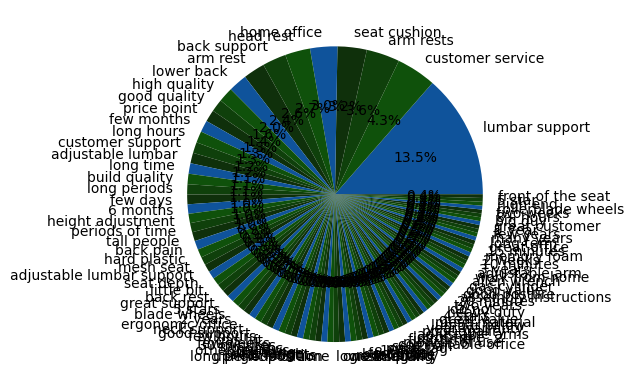

In [ ]:
import matplotlib.pyplot as plt

# 假设df_phrase是您的DataFrame，包含'score'和'phrase'列

fig, ax = plt.subplots()
ax.pie(x=df_phrase['score'], labels=df_phrase['phrase'],
       colors=['#0F539B', '#0F510B', '#0F400B', '#0F300B'],
       autopct='%1.1f%%')  # autopct添加百分比标签

plt.show()  # 展示图表


In [ ]:
df_try = pd.read_csv("all_data_FullDate_someLackrating_someLackPrice.csv")

In [ ]:
df_try.shape

(35241, 6)

In [ ]:
df_try

,Review Date,rating,Product,Review,country,Price
0,2006-03-25,NaN,B0195AKAEG,Big Farce These chairs lack one major adjustme...,United States,694.0
1,2007-04-27,NaN,B0195AKAEG,Nice chair but two problems. I have been using...,United States,694.0
2,2007-06-24,NaN,B0195AKAEG,Correcting Aeron leg circulation problems I ha...,United States,NaN
3,2007-06-27,NaN,B006H1QYBA,Good Chair. Not great - especially considering...,United States,1039.2
4,2007-12-02,NaN,B002LK1YNO,Mixed bag I have mixed feelings about this cha...,United States,911.0
...,...,...,...,...,...,...
35236,2022-11-30,1.0,AK-EX-BK,Not a good chair. Adjustable straps dont stay ...,USA,399.0
35237,2019-11-30,2.0,AK-EX-BK,It's TRUE putting the chair together is a pain...,USA,399.0
35238,2022-11-30,4.0,AK-EX-BK,Very comfortable chair. \nThe front of the cha...,USA,399.0
35239,2019-11-30,3.0,AK-EX-BK,"This chair is by no means a bad chair, however...",USA,399.0


In [ ]:
df_try.columns

Index(['Review Date', 'rating', 'Product', 'Review', 'country', 'Price'], dtype='object')

In [ ]:
from collections import Counter

# Assuming your data is already a Counter object named 'word_counts'
word_counts = Counter(enriched_bag_of_words)

# Get the 10 most common words
most_common_words = word_counts.most_common(100)

print("Most common words:")
for word, count in most_common_words:
    print(f"{word}: {count}")


Most common words:
the: 57544
i: 31659
and: 30762
to: 27004
a: 26680
chair: 26407
it: 21844
is: 19871
this: 16141
for: 15898
of: 15089
in: 12024
my: 11704
that: 10227
not: 9281
back: 9223
but: 9001
was: 8542
you: 7757
with: 7718
on: 7520
have: 6891
so: 5815
very: 5491
as: 5370
be: 5234
seat: 4918
are: 4826
support: 4820
comfortable: 4763
at: 4692
me: 4294
if: 4229
like: 4150
one: 3692
great: 3532
good: 3510
from: 3509
had: 3434
would: 3409
they: 3393
all: 3375
just: 3341
or: 3337
it's: 3201
office: 3199
can: 3116
after: 3022
up: 2953
more: 2891
has: 2889
an: 2877
lumbar: 2839
when: 2808
no: 2750
out: 2704
will: 2651
your: 2595
than: 2588
chairs: 2524
about: 2517
get: 2377
easy: 2301
only: 2291
am: 2274
chair,: 2252
i'm: 2217
too: 2201
really: 2180
sit: 2124
which: 2103
well: 2032
lumbar support: 2025
sitting: 2020
time: 1915
quality: 1911
work: 1861
price: 1838
do: 1832
arm: 1832
much: 1808
because: 1798
there: 1794
also: 1791
use: 1774
-: 1716
even: 1697
some: 1656
office chair: 1591


In [ ]:
df_amazon = pd.read_csv('amaon_US_no_duplicate_with_price(withOldTimereview).csv')
df_web = pd.read_csv('all_clean.csv')
df_wayfair = pd.read_csv('wayfair_final.csv')

In [ ]:
text_amazon = ' '.join(df_amazon[' Review'].tolist()).replace(".", "")
out_amazon = phrasemachine.get_phrases(text_amazon)

text_web = ' '.join(df_web['Review'].tolist()).replace(".", "")
out_web = phrasemachine.get_phrases(text_web)



In [ ]:
out_amazon

{'num_tokens': 1193439,
 'counts': Counter({'big farce': 1,
          'one major adjustment': 1,
          'major adjustment': 2,
          'back while the major focus': 1,
          'major focus': 1,
          'legs without this adjustment': 1,
          'front edge': 37,
          'blood circulation': 8,
          'blood circulation to the rest': 1,
          'circulation to the rest': 1,
          'a high footrest': 1,
          'high footrest': 1,
          'enough relief': 1,
          'other leg': 7,
          'folding canvas': 1,
          'folding canvas chair': 1,
          'canvas chair': 1,
          'outdoor event': 1,
          'long legs': 42,
          'own cushion': 5,
          'long handles': 1,
          'chair for 40 hours': 1,
          '40 hours': 11,
          'legs may': 1,
          'one position': 17,
          'seat design': 7,
          'seat design please': 1,
          'seat design please test': 1,
          'design please': 1,
          'design please tes

In [ ]:
out_web

{'num_tokens': 625268,
 'counts': Counter({'chairover four decades': 1,
          'chairover four decades of office-bound work': 1,
          'four decades': 3,
          'four decades of office-bound work': 2,
          'decades of office-bound work': 2,
          'office-bound work': 2,
          'number of chairs': 4,
          'one beautiful': 3,
          'functional design': 2,
          'functional design great': 2,
          'functional design great ergonomic support': 2,
          'design great': 5,
          'design great ergonomic support': 2,
          'great ergonomic support': 4,
          'ergonomic support': 16,
          'difference from the first day': 2,
          'first day': 29,
          'technical reasons': 2,
          '59 office': 2,
          '59 office chair': 2,
          'office chair': 862,
          'serious damage': 4,
          'embody chair': 149,
          '45 minutes': 9,
          'back of the chair': 77,
          'real physical support': 2,
      

In [ ]:
df_wayfair = df_wayfair.dropna(subset=['Review'])

In [ ]:
text_wayfair = ' '.join(df_wayfair['Review'].tolist()).replace(".", "")
out_wayfair = phrasemachine.get_phrases(text_wayfair)

In [ ]:
out_wayfair

{'num_tokens': 389023,
 'counts': Counter({'bought chair': 2,
          'reclines easy': 1,
          'assembly instructions': 48,
          'assembly instructions since wayfair': 1,
          'instructions since wayfair': 1,
          'own product': 1,
          'own product name': 1,
          'product name': 1,
          'way to google': 1,
          'way to google search': 1,
          'way to google search for youtube': 1,
          'way to google search for youtube instructions': 1,
          'google search': 1,
          'google search for youtube': 1,
          'google search for youtube instructions': 1,
          'search for youtube': 1,
          'search for youtube instructions': 1,
          'youtube instructions': 1,
          'seller of record': 1,
          '3 business': 1,
          '3 business days': 1,
          'business days': 3,
          'radio silence': 1,
          'horrible service': 1,
          'different company': 3,
          'different company my': 1,
   

**Analyzing word use**
Now that we have counted words and phrases from Review Data of Amazon/Wayfair/Official Website, we will analyze differences in the orientation of words and phrases. Specifically we will:

Compute statistics about how frequently different reviewers use particular words and
Display this information on a plot for analysis
The partisanship score we will use in this notebook is  𝑝(𝑤|𝑙𝑖𝑏𝑒𝑟𝑎𝑙)−𝑝(𝑤|𝑐𝑜𝑛𝑠𝑒𝑟𝑣𝑎𝑡𝑖𝑣𝑒)  which is assigned in compute_phrase_scores
Our approach is based on the Fightin' Words method from Monroe et al. Specifically, we will use the word importance score from Section 3.2.2 of Fightin' Words.

In [ ]:
phrasecounts = out
wordcounts = unigram_bag_of_words

In [ ]:
def compute_normalize_counts(_countdict, n):
    '''
    normalize the count of words/phrases by total words (in the L or C wing)
    '''
    normalized_counts = defaultdict(lambda: defaultdict(int))

    for wing in _countdict.keys():
        normalized_counts[wing] = _countdict[wing][p]/n[wing]

    return normalized_counts

def compute_phrase_scores(normalized, _countdict):
    '''
    compute the count and partisanship scores of phrases
    '''
    df = []
    for wing in _countdict.keys():
        for phrase in _countdict[wing]:
            df.append({"score": normalized["L"][phrase] - normalized["C"][phrase],
                    "phrase": phrase,
                    "count": _countdict["C"][phrase] + _countdict["L"][phrase]}) # http://languagelog.ldc.upenn.edu/myl/Monroe.pdf, 3.2.2
    return pd.DataFrame(df).drop_duplicates()

def getK(_df, k=20):
    '''
    Return the top k or bottom k items in a dataframe. This is just a convenience function
    '''
    if k > 0:
        return _df.sort_values("score")[0:k].copy()
    else:
        return _df.sort_values("score")[k:].copy()

def get_top_K_df(counts):
    '''Make a pandas dataframe of the top K partisan phrases for plotting'''
    countdict = counts

    n = {}
    if 'C' in countdict:

      n["C"] = sum(countdict["C"].values())
    else:
      n["C"] = 0  # or any default value you deem appropriate
    if 'L' in countdict:
      n["L"] = sum(countdict["L"].values())
    else:
      n["L"] = 0  # or any default value you deem appropriate

    normalized_counts = compute_normalize_counts(countdict, n)

    df = compute_phrase_scores(normalized_counts, countdict)

    df = df[df["count"] < 200] # exclude high-count lexical items, roughly stop words

    # add an abolute value of the score
    df["score_abs"] = df["score"].apply(lambda x: abs(x))

    return pd.concat([getK(df, k=-20), getK(df, k=20)])


tops_phrases = get_top_K_df(phrasecounts)
tops_words = get_top_K_df(wordcounts)
tops_words["label"] = tops_words["phrase"].apply(lambda x: x.replace(".", ""))
tops_phrases["label"] = tops_phrases["phrase"]

NameError: ignored

In [ ]:
n["C"] = sum(countdict.get("C", {}).values())


In [ ]:
import phrasemachine

utterances = [] # build a list of the utterances we are interested in
c = 0

def theory_phrases(_text):
    '''
    Equivalent to this regex: (theory)(of)D*(A|N)*N)*

    To run this regex on your text, replace all words except "theory of" w. their POS tags
    '''
    for phrase in phrasemachine.get_phrases(_text)["counts"]:
        if phrase[0:len("theory of")] == "theory of":
            yield phrase

for u in tqdm(corpus.get_utterance_ids()):
    u = corpus.get_utterance(u)
    c += 1
    if c == 50000:
        break
    for phrase in theory_phrases(u.text):
        print(phrase)